### Reto analyticalls

Averiguar los números pulsados en el teclado numérico de la grabación dada

In [ ]:
pip install pydub

In [ ]:
import librosa, librosa.display
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from os import path
from pydub import AudioSegment

In [ ]:
file = "adv1.wav"

In [ ]:
src = "adv1.mp3"
sound = AudioSegment.from_mp3(src)
sound.export(src, format="wav")

<_io.BufferedRandom name='adv1.mp3'>

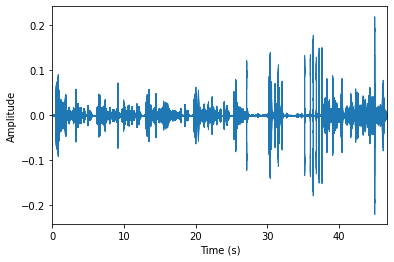

In [ ]:
signal, sr = librosa.load(file, sr=22050)
librosa.display.waveplot(signal, sr=sr)
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.show()

#### Por deducción sabemos que los tonos están en los siguientes intervalos:


*   Primer tono  --> 26.9 - 27.3 s
*   Segundo tono --> 34.6 - 35.6 s
*   Tercer tono  --> 35.6 - 36.2 s
*   Cuarto tono  --> 36.2 - 36.5 s
*   Quinto tono  --> 36.5 - 37 s
*   Sexto tono   --> 37 - 37.3 s



In [ ]:
def find_nearest(array,value):
       idx = (np.abs(array-value)).argmin()
       return array[idx]

In [ ]:
arrM = np.array([1209, 1336, 1447])
arrm = np.array([697, 770, 852, 941])
df = pd.DataFrame(np.array([["1", "2", "3"], ["4", "5", "6"], ["7", "8", "9"], ['*', '0', '#']]),
                  columns=arrM,
                  index=arrm)
df

,1209,1336,1447
697,1,2,3
770,4,5,6
852,7,8,9
941,*,0,#


In [ ]:
intervals = [26.9, 27.3, 34.6, 35.6, 35.6, 36.2, 36.2, 36.5, 36.5, 37, 37, 37.3]
tt = signal.shape[0] / sr

for i in range(6):
  x = signal[int(intervals[2*i]*sr):int(intervals[2*i+1]*sr)]
  fft = np.fft.fft(x)
  magnitude = np.abs(fft)
  freq = np.linspace(0,sr,len(magnitude))

  left_freq = freq[:int(len(freq)/2)]
  left_mag = magnitude[:int(len(freq)/2)]

  salto = left_freq[-1]/len(left_freq)

  frM = left_freq[np.where(left_mag == np.max(left_mag))]
  frm = left_freq[np.where(left_mag == np.max(left_mag[int(650/salto):int(980/salto)]))]

  print("El número marcado es: ", df[find_nearest(arrM, frM)][find_nearest(arrm, frm)])

El número marcado es:  4
El número marcado es:  4
El número marcado es:  6
El número marcado es:  0
El número marcado es:  1
El número marcado es:  7
